# Implementação do Zero

In [2]:
import numpy as np

In [3]:
class PCA:
    def __init__(self, n_components, SVD=True):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.SVD = SVD

    def fit(self, X):
        #Centralize data
        self.mean = np.mean(X, axis=0)
        X_ = X - self.mean
        N = X_.shape[0]

        if not self.SVD:
            #Calculate covariance matriz of centralized data
            cov = (1/N) * (X_.T @ X_)

            #Solve eigenvalues and eigenvectors problem
            lambdas, Us = np.linalg.eig(cov)
            Us = Us.T

        else:
            #Solve SVD for centralized data
            Us, S, _ = np.linalg.svd(X_.T, full_matrices=True)
            Us = Us.T
            lambdas = (S**2)/N
            

        #Sort eigenvectors by eigenvalues
        idxs = np.argsort(lambdas)[::-1]
        Us = Us[idxs]

        #Select the n first eigenvectors
        self.components = Us[:self.n_components]


    
    def transform(self, X):
        X_ = X - self.mean
        return (X_ @ self.components.T)

# Teste

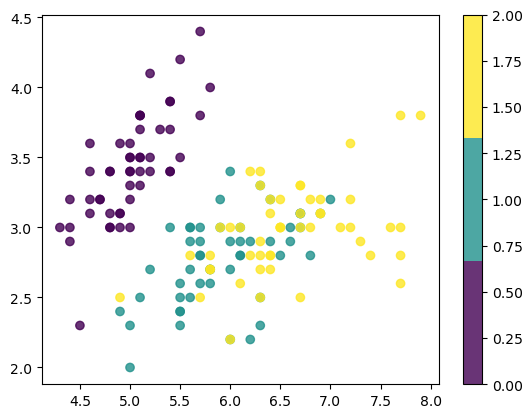

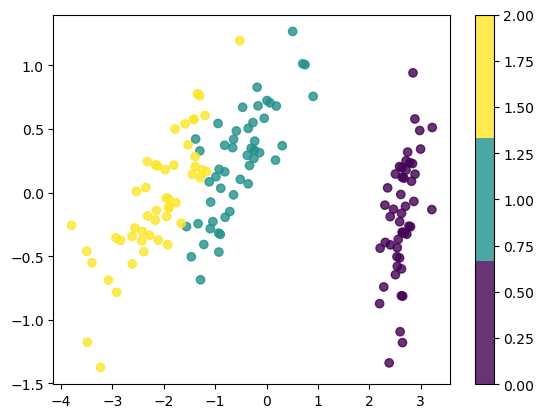

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(2, SVD=True)
pca.fit(X)
X_projected = pca.transform(X)
plt.figure(121)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=plt.get_cmap('viridis',3))
plt.colorbar()
plt.figure(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, alpha=0.8, cmap=plt.get_cmap('viridis',3))
plt.colorbar()
plt.show()

# Modelo Nativo do SKLearn

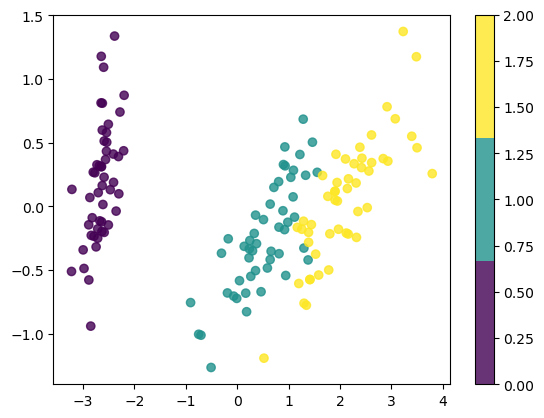

In [7]:
from sklearn.decomposition import PCA as skPCA

skpca = skPCA(2)
X_projected = skpca.fit_transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, alpha=0.8, cmap=plt.get_cmap('viridis',3))
plt.colorbar()
plt.show()

